In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/BankChurners.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [ ]:
num_rows, num_columns = data.shape
print(num_rows, num_columns)

columns_list = data.columns.tolist()
print(columns_list)

10127 23
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


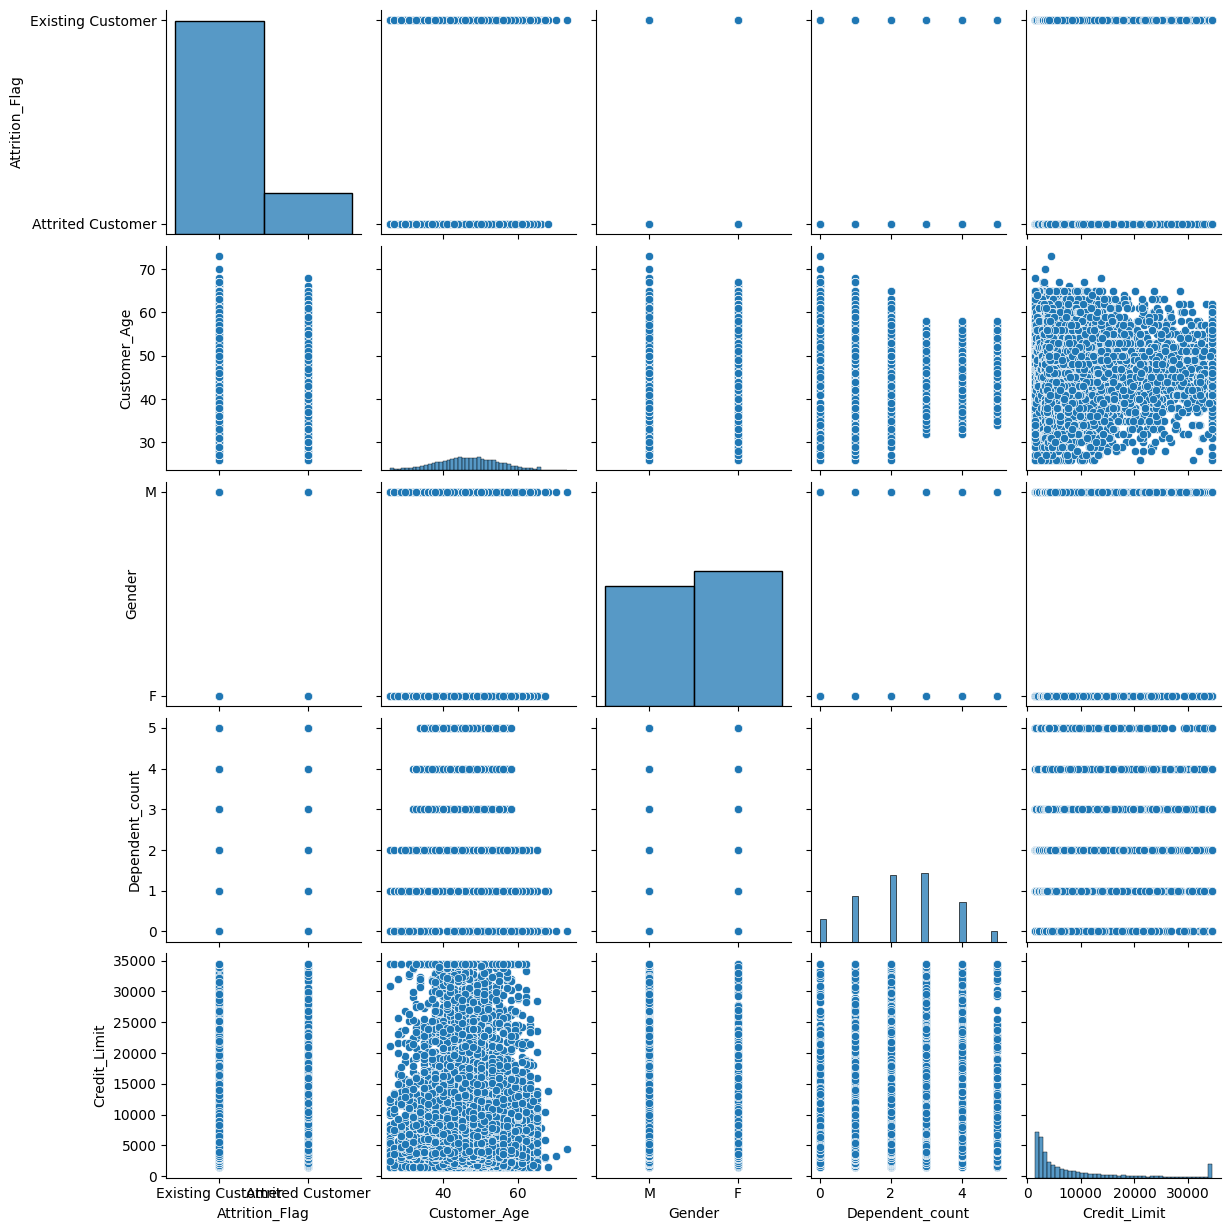

In [ ]:
sns.pairplot(data , vars = ['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count','Credit_Limit'])
plt.show()

In [ ]:
columns_to_delete = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
data = data.drop(columns=columns_to_delete)
print(data)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

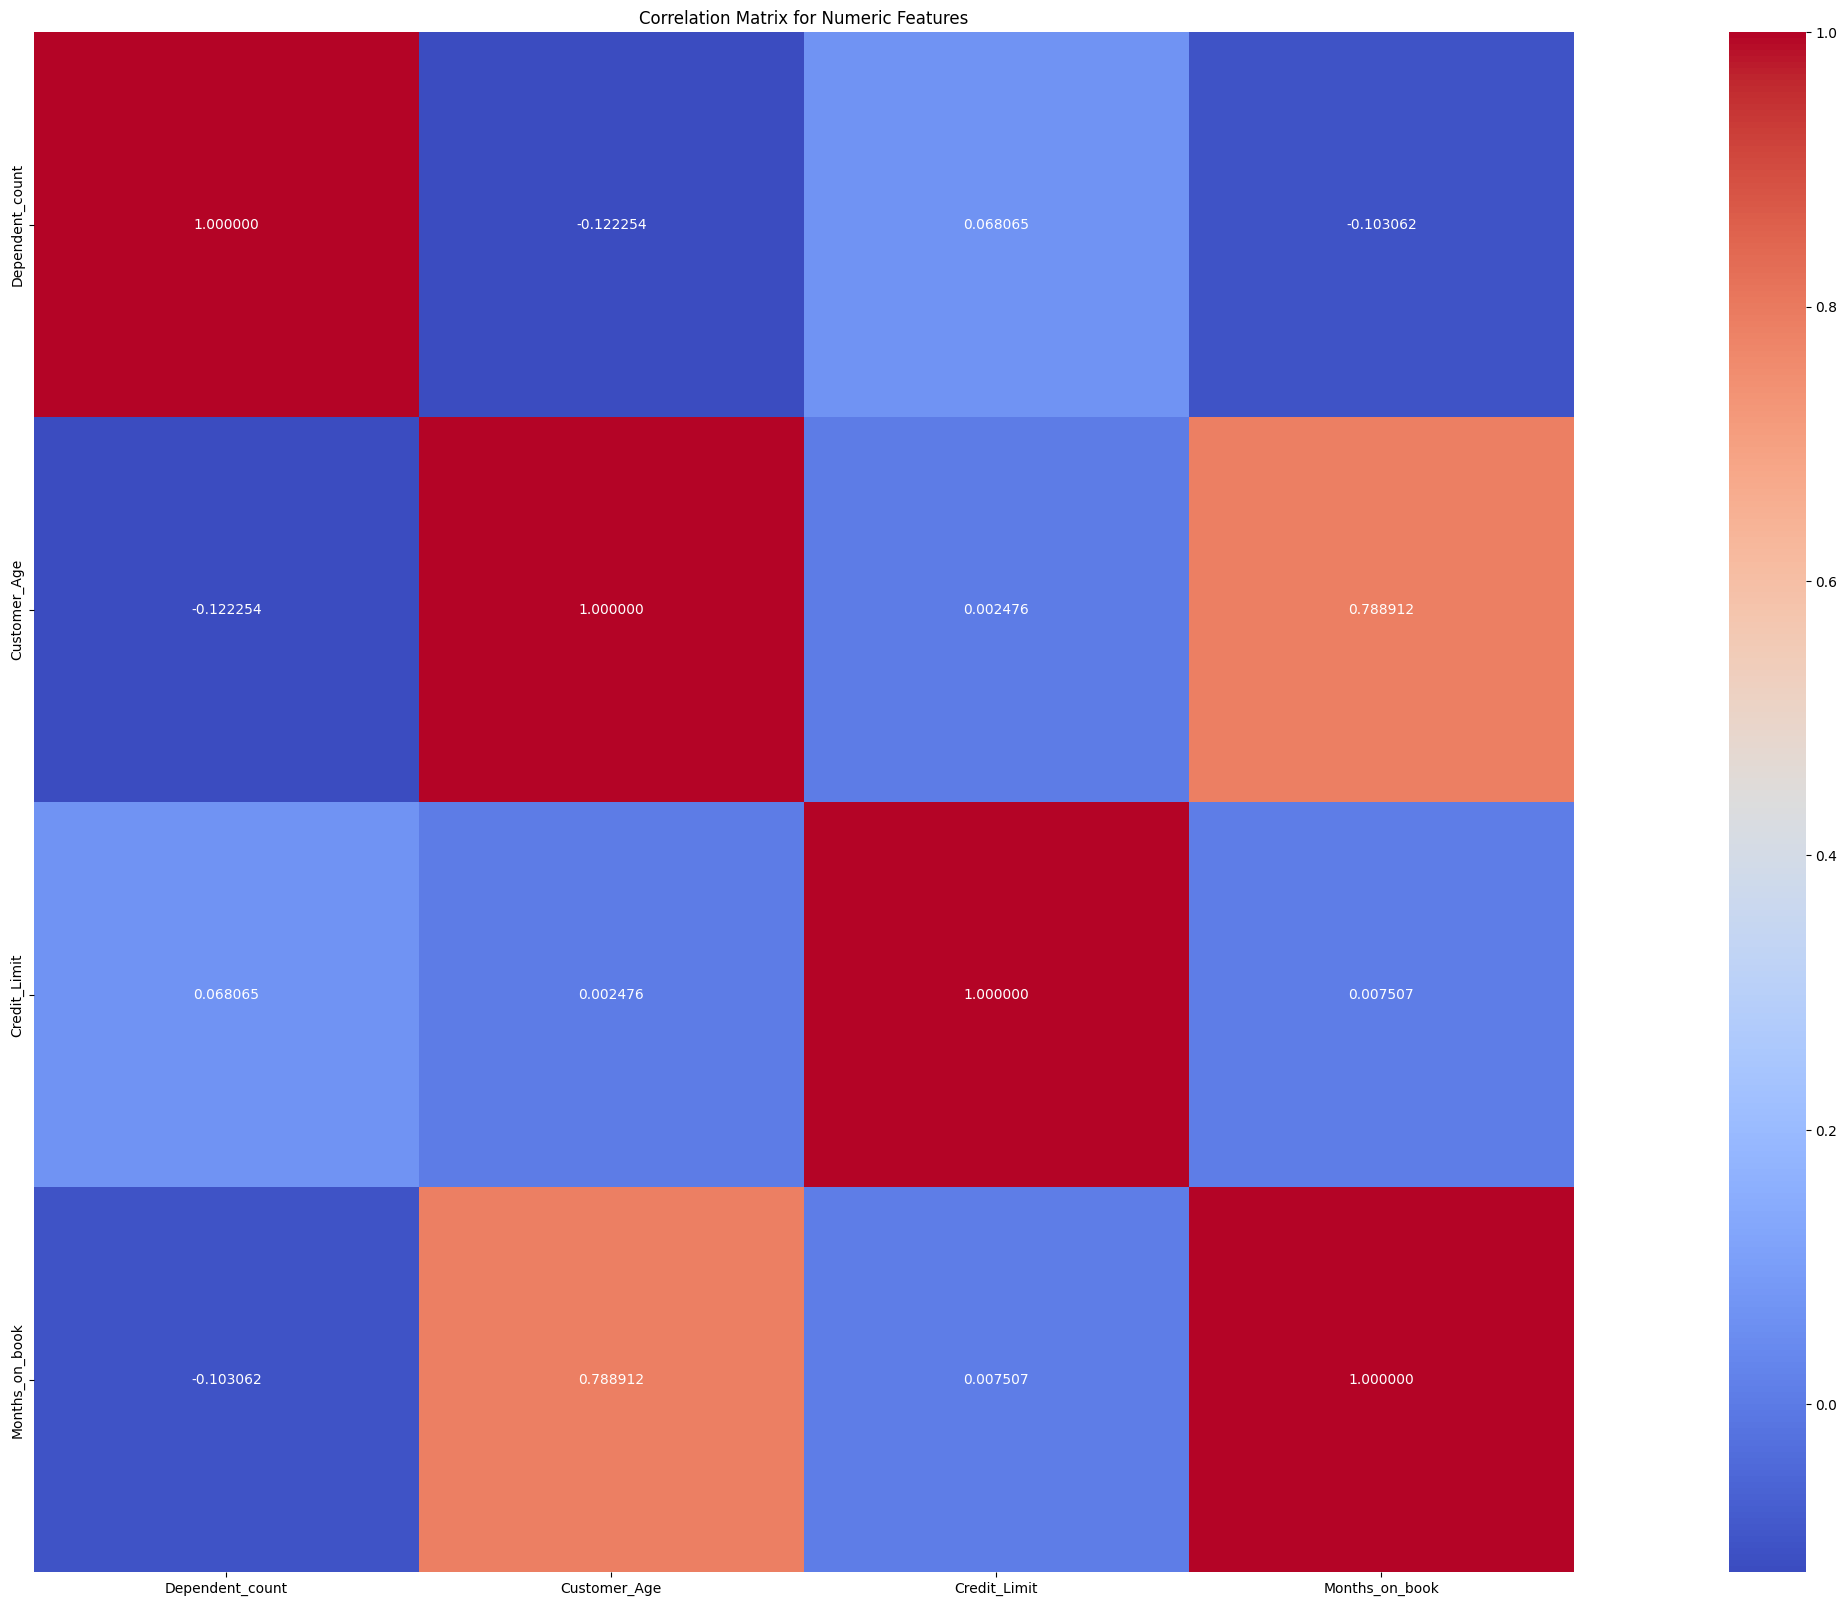

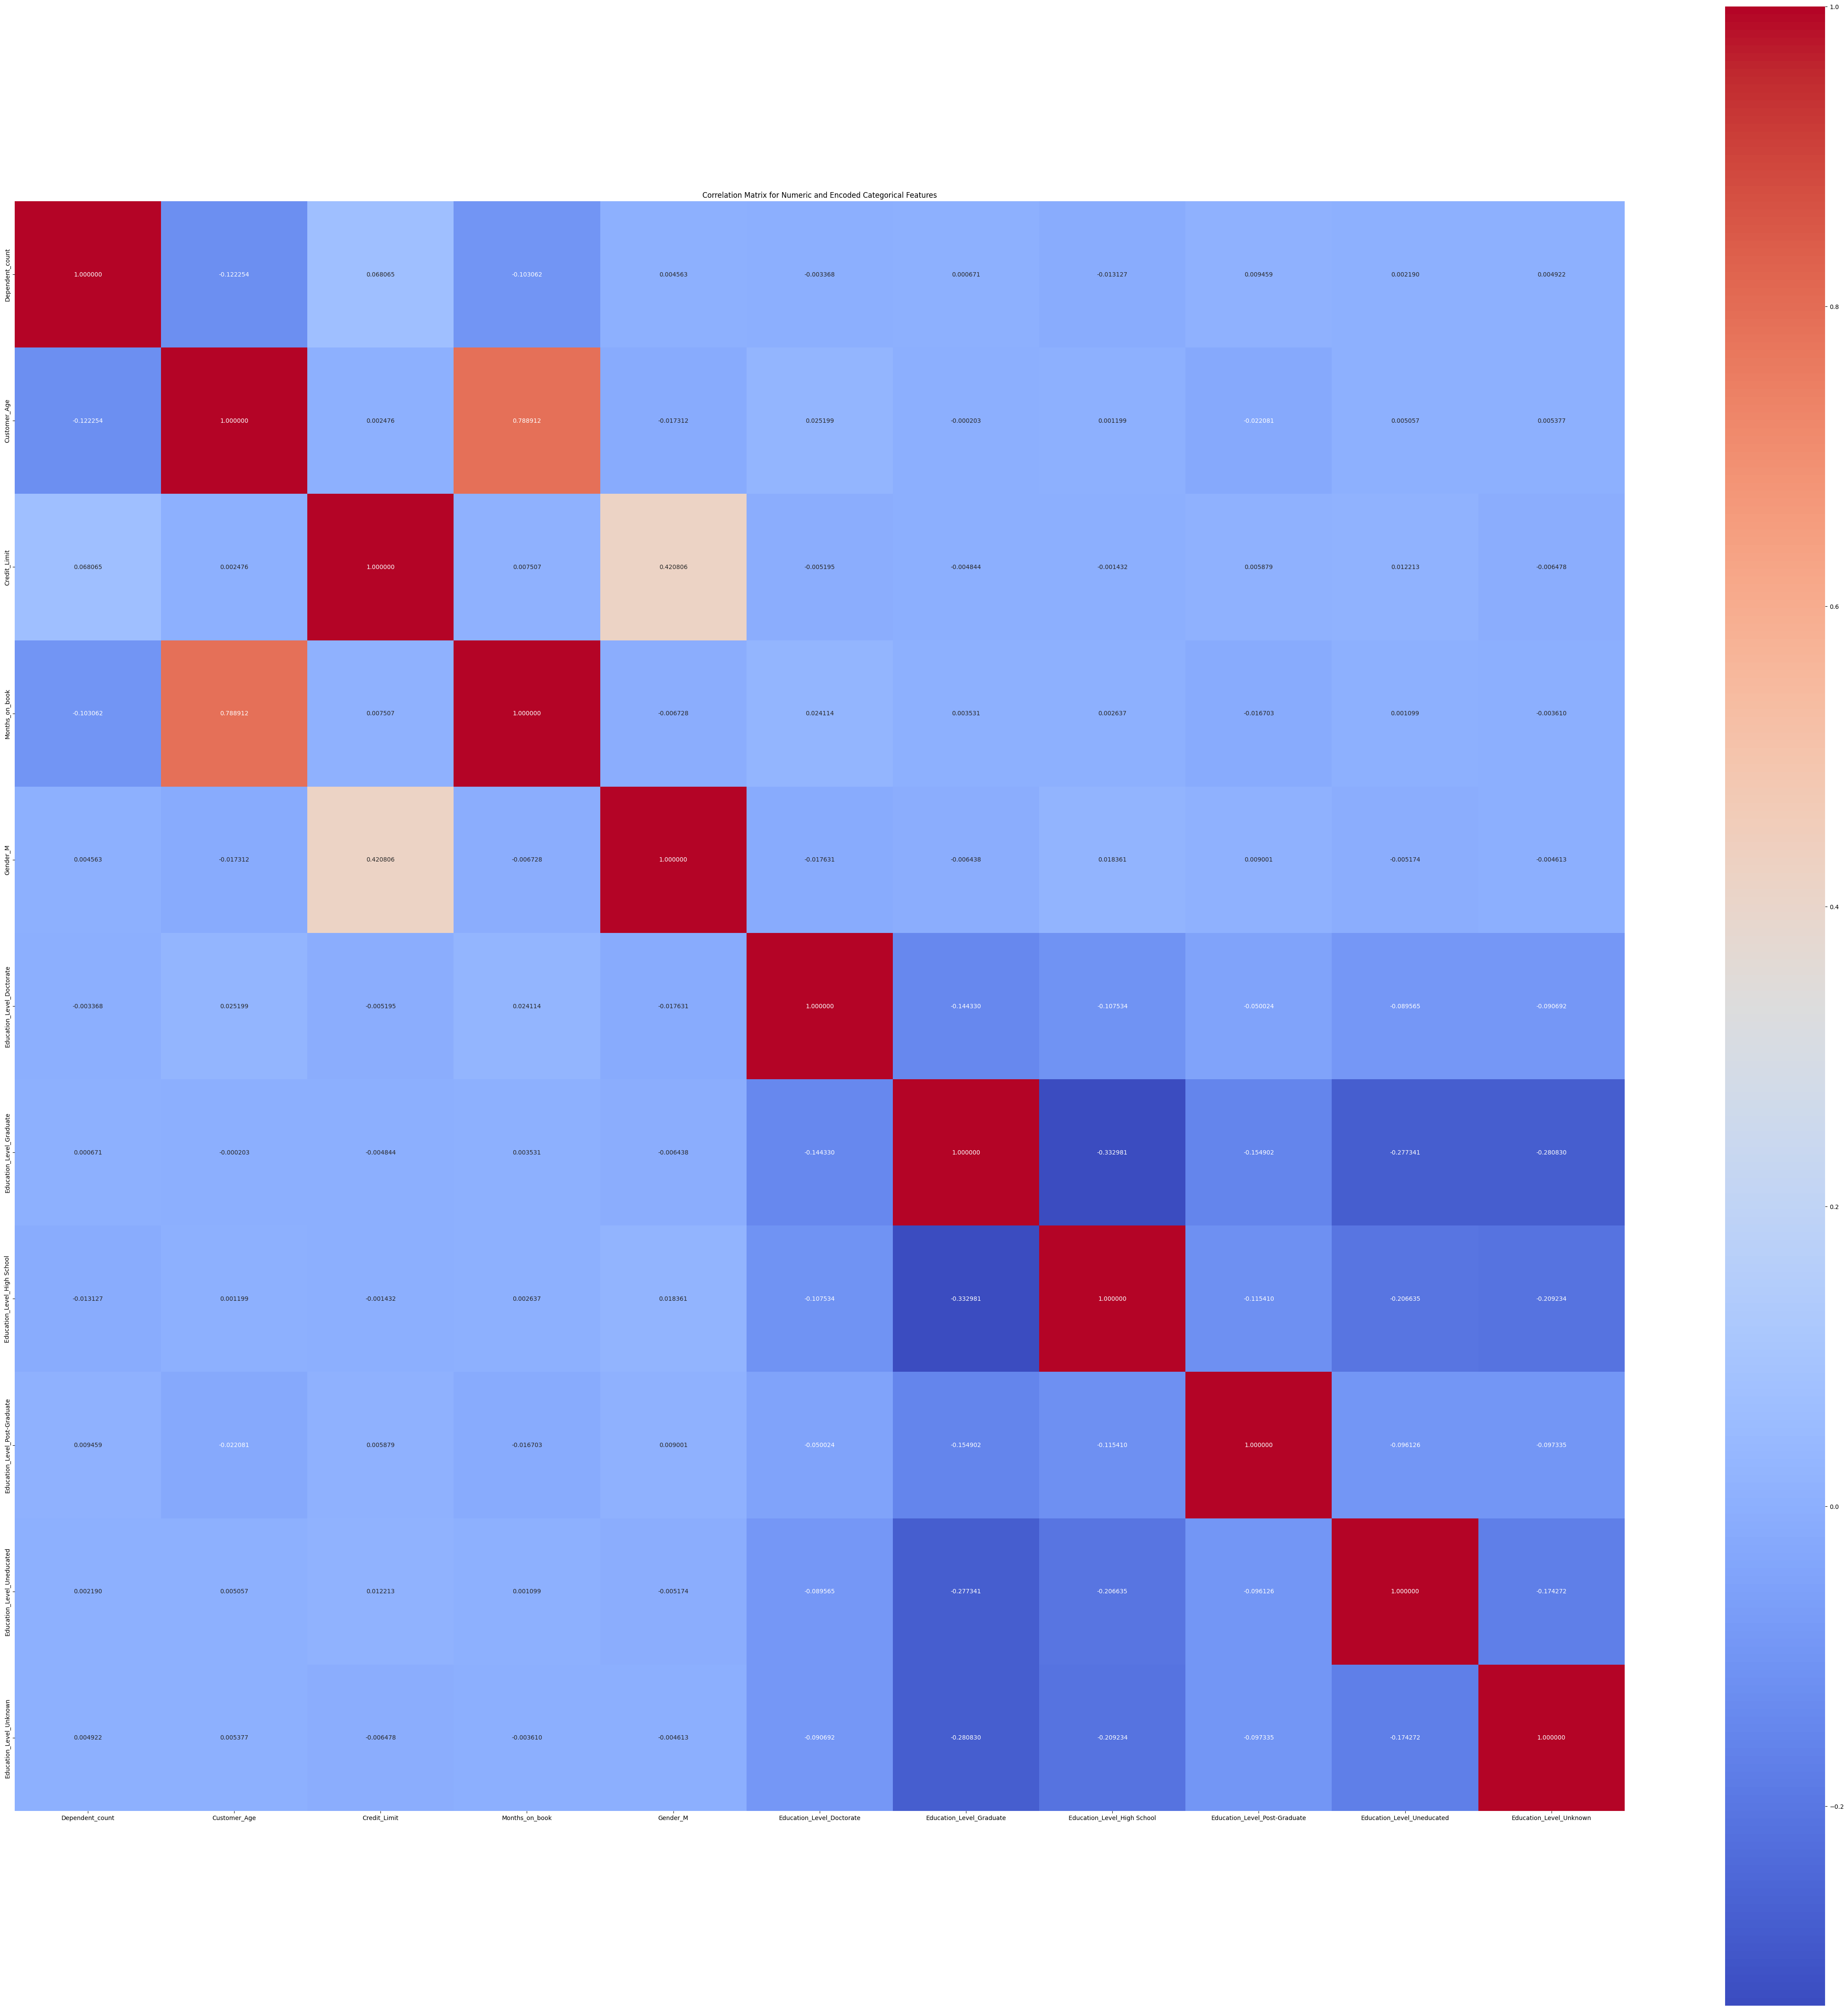

In [ ]:
selected_numeric_cols = data[['Dependent_count','Customer_Age', 'Credit_Limit', 'Months_on_book']]
selected_categoric_cols = data[['Gender', 'Education_Level']]

# Step 2: Convert categorical columns to numeric
# Using one-hot encoding for categorical variables
encoded_data = pd.get_dummies(selected_categoric_cols, drop_first=True)

# Combine numeric and encoded categorical data
combined_data = pd.concat([selected_numeric_cols, encoded_data], axis=1)

# Step 3: Calculate the correlation matrices
numeric_corr = selected_numeric_cols.corr()
combined_corr = combined_data.corr()

# Step 4: Visualize with heatmaps

# Heatmap for numeric features
plt.figure(figsize=(40, 20))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='1f', square=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

# Heatmap for combined features
plt.figure(figsize=(60, 60))
sns.heatmap(combined_corr, annot=True, cmap='coolwarm', fmt='1f', square=True)
plt.title('Correlation Matrix for Numeric and Encoded Categorical Features')
plt.show()

In [ ]:
Nan = data.isna()
print(Nan)

       CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0          False           False         False   False            False   
1          False           False         False   False            False   
2          False           False         False   False            False   
3          False           False         False   False            False   
4          False           False         False   False            False   
...          ...             ...           ...     ...              ...   
10122      False           False         False   False            False   
10123      False           False         False   False            False   
10124      False           False         False   False            False   
10125      False           False         False   False            False   
10126      False           False         False   False            False   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0                False   

In [ ]:
Classnum = data['Attrition_Flag'].unique()
print(Classnum)

['Existing Customer' 'Attrited Customer']


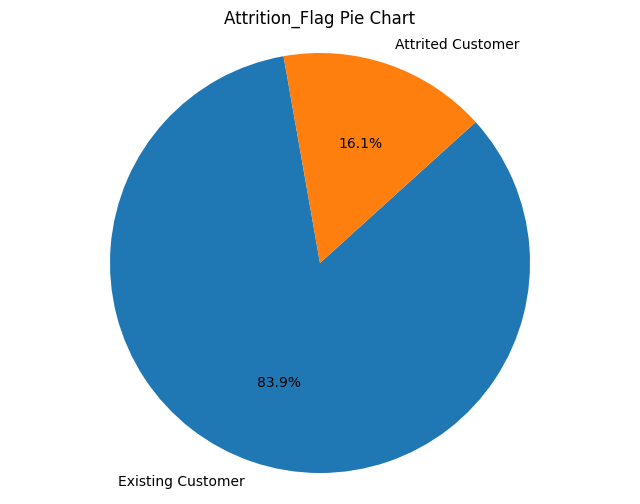

In [ ]:
sizes = data['Attrition_Flag'].value_counts()
labels = sizes.index
plt.figure(figsize=(8, 6))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Attrition_Flag Pie Chart")
plt.show()

In [ ]:
label_encoder = LabelEncoder()
data['Attrition_Flag'] = label_encoder.fit_transform(data['Attrition_Flag'])
print(data['Attrition_Flag'])

numeric_cols = data.select_dtypes(include=['int64', 'float64'])
categorical_cols = data.select_dtypes(include=['object'])

encoded_data = pd.get_dummies(categorical_cols, drop_first=True)

combined_data = pd.concat([numeric_cols, encoded_data], axis=1)

X = combined_data.drop(columns=['Attrition_Flag'], axis=1)
y = combined_data['Attrition_Flag']  # Target variable


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=33)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=33)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Set max_iter as needed
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = model.predict(X_test)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64
Validation Confusion Matrix:
[[   0  227]
 [   0 1109]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       227
           1       0.83      1.00      0.91      1109

    accuracy                           0.83      1336
   macro avg       0.42      0.50      0.45      1336
weighted avg       0.69      0.83      0.75      1336

Test Confusion Matrix:
[[   0  429]
 [   0 2286]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       429
           1       0.84      1.00      0.91      2286

    accuracy                           0.84      2715
   macro avg       0.42      0.50      0.46      2715
weighted avg       0.71      0.84      0.77      2715



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
label_encoder = LabelEncoder()
data['Attrition_Flag'] = label_encoder.fit_transform(data['Attrition_Flag'])
print(data['Attrition_Flag'])

numeric_cols = data.select_dtypes(include=['int64', 'float64'])
categorical_cols = data.select_dtypes(include=['object'])

encoded_data = pd.get_dummies(categorical_cols, drop_first=True)

combined_data = pd.concat([numeric_cols, encoded_data], axis=1)

X = combined_data.drop(columns=['Attrition_Flag'], axis=1)
y = combined_data['Attrition_Flag']  # Target variable


# Split data into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=33)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=21)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Further split temp data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=33)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning appears
model.fit(X_train_balanced, y_train_balanced)

# Validate the model
y_val_pred = model.predict(X_val)
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = model.predict(X_test)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64
Validation Confusion Matrix:
[[154  73]
 [326 783]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.68      0.44       227
           1       0.91      0.71      0.80      1109

    accuracy                           0.70      1336
   macro avg       0.62      0.69      0.62      1336
weighted avg       0.81      0.70      0.74      1336

Test Confusion Matrix:
[[ 269  160]
 [ 732 1554]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.63      0.38       429
           1       0.91      0.68      0.78      2286

    accuracy                           0.67      2715
   macro avg       0.59      0.65      0.58      2715
weighted avg       0.81      0.67      0.71      2715



In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64
Attrition_Flag
1    83.934038
0    16.065962
Name: proportion, dtype: float64
Attrition_Flag
0    1627
1    8500
dtype: int64


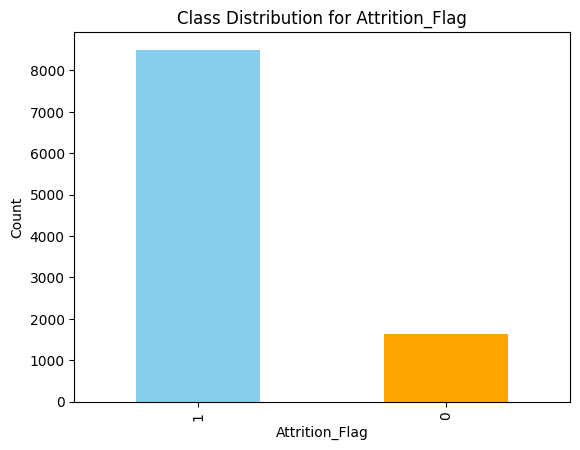

               CLIENTNUM                                           \
                   count          mean           std          min   
Attrition_Flag                                                      
0                 1627.0  7.352614e+08  3.557725e+07  708083283.0   
1                 8500.0  7.399272e+08  3.710723e+07  708082083.0   

                                                                     \
                        25%          50%           75%          max   
Attrition_Flag                                                        
0               712371258.0  716564433.0  7.683737e+08  828294933.0   
1               713219658.0  718164333.0  7.783415e+08  828343083.0   

               Customer_Age             ... Total_Ct_Chng_Q4_Q1         \
                      count       mean  ...                 75%    max   
Attrition_Flag                          ...                              
0                    1627.0  46.659496  ...               0.692  2.500   
1 

In [ ]:
df = pd.DataFrame(data)

class_distribution = df["Attrition_Flag"].value_counts()
print(class_distribution)

class_percentage = df["Attrition_Flag"].value_counts(normalize=True) * 100
print(class_percentage)

grouped_data = df.groupby("Attrition_Flag").size()
print(grouped_data)

class_distribution.plot(kind="bar", color=["skyblue", "orange"])
plt.title("Class Distribution for Attrition_Flag")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.show()

summary_by_class = df.groupby("Attrition_Flag").describe()
print(summary_by_class)

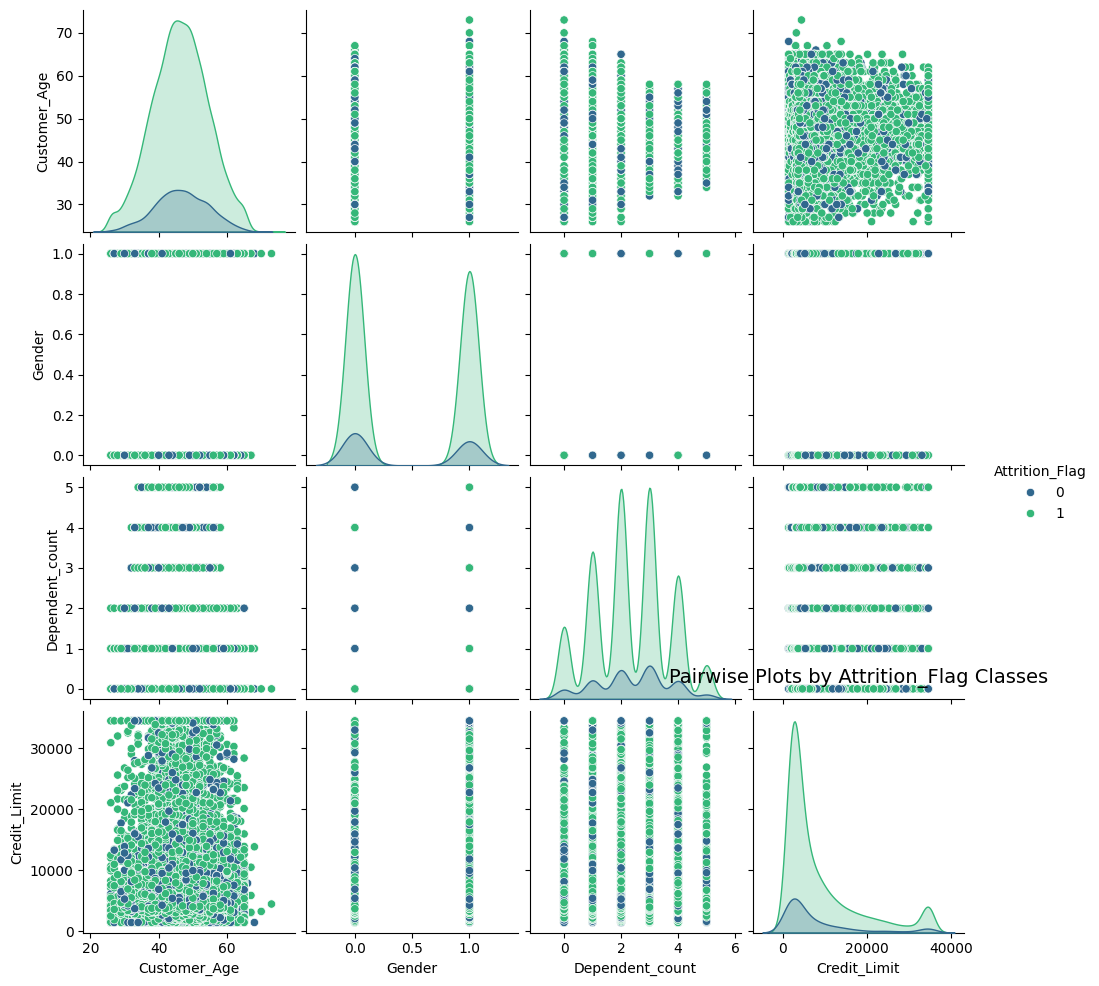

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
sns.pairplot(
    data,
    vars=['Customer_Age', 'Gender', 'Dependent_count', 'Credit_Limit'],  # Exclude 'Attrition_Flag' from vars
    hue='Attrition_Flag',  # Color points based on Attrition_Flag classes
    palette='viridis',  # Optional: Adjust the color palette
    diag_kind='kde'  # Use KDE plots for diagonal distributions
)

plt.title("Pairwise Plots by Attrition_Flag Classes", fontsize=14, pad=20)  # Add a title
plt.show()